In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
df = pd.read_csv('../data/San_Francisco_restaurant_reviews_sentences.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
df.head()

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length,sentences,sentence_count,sentence
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,Absolutely amazing.
1,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,I've dined here at least 6 times since moving ...
2,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,Every experience has been great and those I re...
3,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,So good we went twice in one week!
4,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,After a recommendation from the barista by our...


In [5]:
df.describe()

,review_id,restaurant_rating,customer_rating,review_text_length,sentence_count
count,469122.000000,469122.000000,469122.000000,469122.000000,469122.000000
mean,24929.457414,4.230918,4.244165,1106.716163,15.315048
std,14736.603301,0.274399,1.027737,858.130619,11.276140
min,0.000000,4.000000,1.000000,17.000000,1.000000
25%,11992.000000,4.000000,4.000000,504.000000,8.000000
50%,24816.000000,4.000000,5.000000,883.000000,12.000000
75%,37856.000000,4.500000,5.000000,1448.000000,20.000000
max,49999.000000,5.000000,5.000000,4986.000000,87.000000


- Average amount of sentences per review is 15.

## Checking and getting rid of useless sentences

In [6]:
df['sentence'].value_counts().iloc[0:30]

:)                     368
*                      278
Food:                  176
Wow!                   146
Wow.                   136
Highly recommend!      129
Highly recommend.      115
Yes.                   107
2.                     106
Yum!                   103
Delicious!              99
-                       97
Delicious.              96
Service:                95
So good!                88
Amazing.                87
Tip:                    86
Great service.          82
FOOD:                   75
Cash only.              72
3.                      72
Love this place!        69
Amazing!                67
Yum.                    67
I love this place.      67
So good.                66
Service was great.      64
No.                     62
Highly recommended.     59
SERVICE:                55
Name: sentence, dtype: int64

In [7]:
# Removing sentences that are just a number and a period
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\d.$', '', x))

In [8]:
# Removing sentences that aren't alphanumeric characters
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\W+$', '', x))

In [9]:
# Removing sentences that are just a word and a colon
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r'^\w+:$', '', x))

In [10]:
print(df.shape)
df = df[df['sentence'] != '']
print(df.shape)

(469122, 9)
(466613, 9)


In [11]:
df['sentence'].value_counts().iloc[0:60]

Wow!                          146
Wow.                          136
Highly recommend!             129
Highly recommend.             115
Yes.                          107
Yum!                          103
Delicious!                     99
Delicious.                     96
So good!                       88
Amazing.                       87
Great service.                 82
Cash only.                     72
Love this place!               69
Yum.                           67
I love this place.             67
Amazing!                       67
So good.                       66
Service was great.             64
No.                            62
Highly recommended.            59
Enjoy!                         55
Highly recommended!            51
Love this place.               51
Thank you!                     51
Great food.                    50
Lol.                           49
You won't regret it.           48
Service was good.              44
It was delicious.              43
The food was d

## Lemmatizing sentences and getting the count of occurences of each of the words

In [12]:
# Create lemmatizer and tokenizer
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [13]:
# lemmatizing and tokenizing sentences
df['lemmatized'] = df['sentence'].apply(lambda x: [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(x.lower())])

In [14]:
# Checking the english stop words
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Removing stopwords from lemmatized tokens
df['lemmatized'] = df['lemmatized'].apply(lambda x: [token for token in x if token not in stopwords.words('english')])

In [16]:
# Create the word_df by extending all of the lemmatized lists

word_df = []

# Going through each row and appending the words to the word df
for idx, row in df.iterrows():
    word_df.extend(row['lemmatized'])
                   
word_df = pd.DataFrame(word_df, columns=['word'])

In [17]:
# Changing df to be a count of each word found
word_df = word_df['word'].value_counts()

In [18]:
word_df.head()

wa       124910
food      33734
good      32559
place     29930
time      22620
Name: word, dtype: int64

In [19]:
word_df.shape

(45617,)

In [20]:
word_count_greater_than_1000 = word_df[word_df >= 1000]
word_count_greater_than_1000.shape

(631,)

In [21]:
def barchart_of_words(counts, words, title):
    plt.figure(figsize = (10, 8))
    y_pos = np.arange(30)
    plt.rc('axes', titlesize=30) 
    plt.rc('axes', labelsize=20) 
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15) 
    plt.barh(y_pos ,counts)
    plt.yticks(y_pos, words)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.savefig(f'../images/{title}')

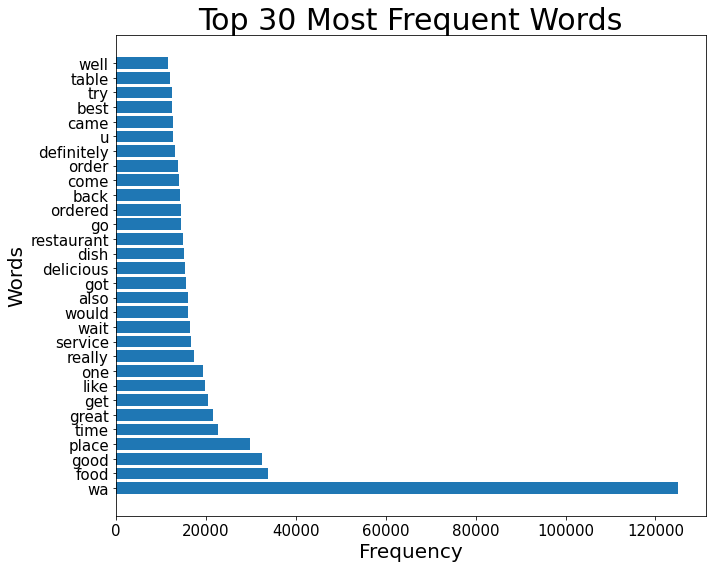

In [22]:
barchart_of_words(word_count_greater_than_1000[0:30], word_count_greater_than_1000[0:30].index,
                  'Top 30 Most Frequent Words')

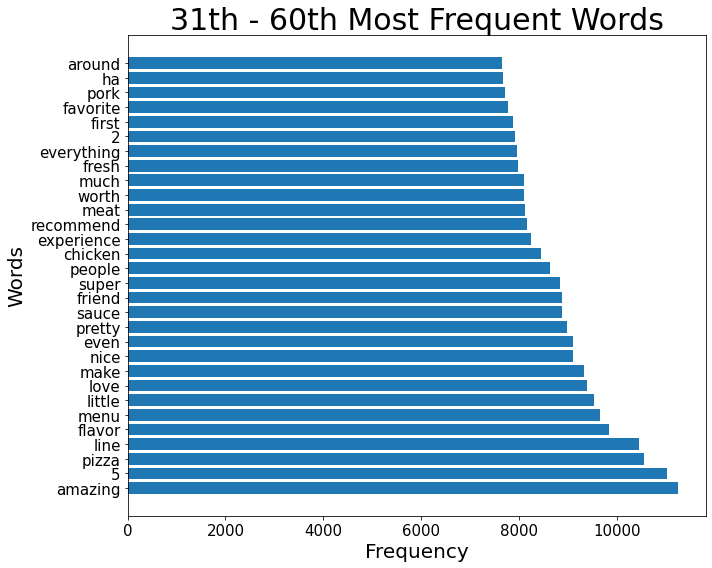

In [23]:
barchart_of_words(word_count_greater_than_1000[30:60], word_count_greater_than_1000[30:60].index,
                  '31th - 60th Most Frequent Words')

## Examining words and creating a key words list

In [24]:
for idx, value in zip(word_count_greater_than_1000[600:].index, word_count_greater_than_1000[600:]):
    print(idx, value)

loud 1080
card 1079
fusion 1077
excited 1075
wife 1072
bone 1069
opened 1069
authentic 1068
unfortunately 1068
craving 1065
vegetable 1064
cheap 1059
seems 1057
magic 1055
several 1054
carne 1054
please 1053
truly 1052
banana 1051
impressed 1042
coconut 1040
croissant 1033
taking 1028
business 1021
tiny 1020
apple 1013
host 1010
fact 1009
fluffy 1002
disappoint 1001
today 1001


- Went through the 635 words that had a frequency of over 1000 to find terms to categorize the sentences

In [25]:
food_words = ['food', 'delicious', 'dish' ,'ordered', 'pizza', 'flavor', 'menu',
             'sauce', 'chicken', 'meat', 'fresh', 'pork', 'burrito', 'bread', 'taste',
             'fried', 'salad', 'dinner', 'cheese', 'drink', 'oyster', 'sweet', 'try', 
             'fish', 'egg', 'potato', 'sandwich', 'rice', 'spicy', 'seafood', 'shrimp',
             'clam', 'coffee', 'dessert', 'crab', 'portion', 'toast', 'tasty', 'bacon', 'taco',
             'soup', 'beef', 'plate', 'course', 'crispy', 'chip', 'dumpling', 'cooked', 'tasted',
             'lunch', 'quality', 'flavorful', 'cream', 'huge', 'excellent', 'perfectly', 'noodle',
             'eating', 'wine', 'appetizer', 'chowder', 'slice', 'served', 'roll', 'rib', 'large', 'piece',
             'pancake', 'tender', 'style', 'fry' , 'bean', 'benedict', 'cut', 'cocktail', 
             'steak', 'ramen', 'soft', 'chocolate', 'light', 'lemon', 'crust', 'yummy', 'sausage',
             'entree', 'texture', 'sushi', 'filling', 'bowl', 'grilled', 'wing', 'lamb', 'korean', 'butter',
             'tea', 'ordering', 'ingredient', 'mushroom', 'tomato', 'onion', 'salmon', 'salsa',
             'curry', 'water', 'broth', 'cioppino',' veggie', 'mexican', 'ate', 'cold' , 'duck',
             'creamy', 'belly', 'mouth', 'juicy', 'salty', 'burger', 'ice', 'thick', 'rich', 'thai', 'scallop'
             'chef', 'savory', 'vegan', 'avocado', 'shared', 'pasta', 'spice', 'red', 'crunchy', 
             'chop', 'pepper', 'yum', 'vegetarian', 'seasoned', 'thin', 'roasted', 'kimchi', 'beignet',
             'combo', 'tart', 'heavy', 'risotto', 'stuffed', 'italian', 'bakery', 'generous', 'asada',
             'mussel', 'lobster', 'sour', 'serving', 'pastry', 'ricotta', 'topping' , 'spinach', 'fusion',
             'bone', 'authentic', 'vegetable', 'craving', 'carne', 'banana', 'coconut', 'croissant', 'apple',
             'fluffy', 'hungry', 'biscuit', 'cake', 'gumbo', 'blueberry', 'mimosa', 'tough', 'chewy', 'refill',
             'meal','seasoning']

service_words = ['service', 'staff', 'friendly', 'waiter', 'customer', 
                 'ask', 'attentive', 'told', 'tip', 'waitress', 'employees', 'employee', 'server']
time_words = ['wait', 'line', 'reservation', 'minute', 'hour', 'night', 'seated', 'waiting',
              'busy', 'early', 'waited', 'quick', 'quickly', 'fast', 'weekend', 'morning', 
              'waitlist', 'evening', 'serve', 'month', 'crowded', 'patient']

In [26]:
#Saving key word lists to files

with open("../assets/food_words.txt", "w") as f:
    for word in food_words:
        f.write(word +"\n")
        
with open("../assets/service_words.txt", "w") as f:
    for word in service_words:
        f.write(word +"\n")
        
with open("../assets/time_words.txt", "w") as f:
    for word in time_words:
        f.write(word +"\n")

Created a list of words to filter through the messages by looking at words that were used at least 1000 times

## Labeling sentences by category

In [27]:
food_set = set(food_words)
service_set = set(service_words)
time_set = set(time_words)

df['food_review'] = False
df['service_review'] = False
df['time_review'] = False

df['food_review'] = df['lemmatized'].apply(lambda x: set(x)&food_set)
df['service_review'] = df['lemmatized'].apply(lambda x: set(x)&service_set)
df['time_review'] = df['lemmatized'].apply(lambda x: set(x)&time_set)
df.head()

,review_id,restaurant_name,restaurant_rating,customer_rating,review_text,review_text_length,sentences,sentence_count,sentence,lemmatized,food_review,service_review,time_review
0,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,Absolutely amazing.,"[absolutely, amazing]",{},{},{}
1,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,I've dined here at least 6 times since moving ...,"[dined, least, 6, time, since, moving, bay, ar...",{},{},{}
2,0,Brenda's French Soul Food,4.0,5,Absolutely amazing. I've dined here at least 6...,217,"['Absolutely amazing.', ""I've dined here at le...",3,Every experience has been great and those I re...,"[every, experience, ha, great, recommended, ea...",{food},{},{}
3,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,So good we went twice in one week!,"[good, went, twice, one, week]",{},{},{}
4,1,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,560,"['So good we went twice in one week!', ""After ...",8,After a recommendation from the barista by our...,"[recommendation, barista, hotel, walked, brend...",{},{},{}


In [28]:
food_reviews = df[df['food_review'] != set()]
print(food_reviews.shape)

(261459, 13)


In [29]:
service_reviews = df[df['service_review'] != set()]
print(service_reviews.shape)

(39215, 13)


In [30]:
time_reviews = df[df['time_review'] != set()]
print(time_reviews.shape)

(61131, 13)


In [31]:
unclassified_reviews = df[(df['food_review'] == set()) & (df['service_review'] == set()) & (df['time_review'] == set())]
print(unclassified_reviews.shape)

(149072, 13)


In [32]:
# Looking at sentences that relate to food and the key word that helped categorize the sentence
for idx , row in food_reviews[['sentence', 'food_review']].iloc[0:30].iterrows():
    print(row['sentence'], row['food_review'], '\n')

Every experience has been great and those I recommended to eat here all let me know how good the food was as well. {'food'} 

I got the Florentine Benedict and my friend got the Corn Succotash & White Cheddar Omelette (not pictured). {'benedict'} 

Everything was great - savory, a little spice, comforting! {'savory', 'spice'} 

I ended up going back to try the dinner menu a few nights later - the shrimp and grits was everything I wanted. {'dinner', 'try', 'shrimp', 'menu'} 

The beignets are a must try - SO big and fluffy and filled to perfection. {'beignet', 'try', 'fluffy'} 

Food. was good but service was decidedly uneven. {'food'} 

If i were to go back i'd only get the crawfish beignets and the gravy + biscuits. {'beignet', 'biscuit'} 

We got:- Beignet flight (5/5): highly recommend the apple + crawfish ones if you order singles!- pork belly grits (3/5): There's not enough acidity to cut down the fat of the pork belly so it's really hard to eat more than half- gravy + biscuits (5

In [33]:
# Looking at non classified sentences
for _, row in unclassified_reviews['sentence'].iloc[250:290].iteritems():
    print(row)

Interiors are nice and cozy.
I probably should hurry up the next time.
The issue was with the kids on the next table who were blowing small paper balls through a straw on us and the elders were giving a blind eye.
Haven't been here in a while, so here my update.
Dropped 1 star..
2 Stars.
I'm not sure what happened they are not the same as I remember.
3 StarsOn to the Bene..
I just wish they put on more!
Luckily, they allowed the five of us to squeeze in the corner table next to the expresso machine.
so it's no surprise.
Great interior decorations with lots of Art create a wonderful atmosphere.
Parking was always difficult in downtown SF so be ready for it.
Wow!
Stepping into this place was like taking a trip back in time.
I really felt like I had been transported back to simpler times in New Orleans.
All in all, a great place to eat!
There is a down home feeling to this high tone cuisine at Brenda's.
Foodies will be in heaven, and plain old diners will be in their happy place, too!
the

In [34]:
# Looking at sentences that relate to service
for idx , row in service_reviews[['sentence', 'service_review']].iloc[0:30].iterrows():
    print(row['sentence'], row['service_review'], '\n')

Friendly and quick service. {'friendly', 'service'} 

Food. was good but service was decidedly uneven. {'service'} 

Some servers were curt & incompetent (gave us wrong orders, had no patience and hurried us up), others were attentive. {'server', 'attentive'} 

Was very hesitant about leaving a tip. {'tip'} 

Service: great! {'service'} 

the staff were all very nice :) {'staff'} 

Service was good, we were taken care of promptly and our food came out at a good pace. {'service'} 

Amazing food, legit mimosas and attentive service, I got only good things to say about Brenda's. {'service', 'attentive'} 

Great service. {'service'} 

Ordered the following : ( check receipt picture ) 1-5 rating 5 Service-The host did fabulous and was friendly and patient . {'service', 'friendly'} 

Server was nice as well , she made a weird comment when we ordered so many dishes . {'server'} 

Other server was on spot and consistent.1-5 rating 4 1/2Ambiance- Way too small location and in a bad area a lot o

In [35]:
# Looking at sentences that relate to time
for idx , row in time_reviews[['sentence', 'time_review']].iloc[0:30].iterrows():
    print(row['sentence'], row['time_review'], '\n')

There was a wait but it moved quickly. {'wait', 'quickly'} 

Friendly and quick service. {'quick'} 

I ended up going back to try the dinner menu a few nights later - the shrimp and grits was everything I wanted. {'night'} 

Hadn't been here in years because the neighborhood has become increasingly rough and filthy and waiting for a table first thing in the morning under such circumstances isn't a good way to start the day. {'morning', 'waiting'} 

But snagged a reservation and finally returned today. {'reservation'} 

There was a lot of grind sediment at the bottom of my cup which made it a really unpleasant morning experience. {'morning'} 

It can be crowed at times so be patient. {'patient'} 

Well worth any wait. {'wait'} 

We were seated very quickly as a walk-in party of two.* {'seated', 'quickly'} 

I wasn't sure how crowded this place would get, so we decided to be here for opening which also helped us get an early start to the day. {'crowded', 'early'} 

Can't wait to return! 

## Sentiment Analyzer to Assign Individual Scores

In [36]:
sent = SentimentIntensityAnalyzer()

In [37]:
restaurants = list(df['restaurant_name'].value_counts().index)

In [38]:
review_types = ['food_review', 'service_review', 'time_review']

In [39]:
def get_review_score(df, sent, text_col):
    
    total_score = 0
    for idx, row in df.iterrows():
        total_score += sent.polarity_scores(row[text_col])['compound']
        
    total_score = total_score / len(df.index)
    
    return (total_score + 1) * 5 / 2

- The Sentiment Analysis Score is between -1 and 1 so 1 is added to make it between 0/2 and then multipled by 5/2 to make the scores out of 5

## Checking the sentiment analysis on all the reviews from 5 restaurants

In [40]:
five_restaurants = pd.read_csv('../data/San_Francisco_restaurant_reviews_first_5.csv')
full_review_restaurants = list(five_restaurants['restaurant_name'].value_counts().index)
full_review_df = pd.DataFrame([], columns = ['restaurant', 'real_rating', 'sentiment_rating'])
print(five_restaurants.shape)

for restaurant in full_review_restaurants:
    
    rest_df = five_restaurants[five_restaurants['restaurant_name'] == restaurant]
    
    real_rating = rest_df.iloc[-1]['restaurant_rating']
    sent_rating = get_review_score(rest_df, sent, 'review_text')
    
    print(restaurant, real_rating, sent_rating)
    print(rest_df.shape)
    full_review_df.loc[len(full_review_df.index)] = [restaurant, real_rating, sent_rating]


(40930, 5)
Brenda's French Soul Food 4.0 4.4493688329363685
(11756, 5)
Tartine Bakery 4.0 4.26160765228576
(8553, 5)
House of Prime Rib 4.0 4.416319259440292
(8183, 5)
Hog Island Oyster 4.5 4.556505917602995
(6675, 5)
Gary Danko 4.5 4.653546590317542
(5763, 5)


In [41]:
full_review_df

,restaurant,real_rating,sentiment_rating
0,Brenda's French Soul Food,4.0,4.449369
1,Tartine Bakery,4.0,4.261608
2,House of Prime Rib,4.0,4.416319
3,Hog Island Oyster,4.5,4.556506
4,Gary Danko,4.5,4.653547


- Pulled all the reviews for these 5 restaurants and compared the average sentiment rating of each review to the real rating on yelp. The numbers match up closely and there aren't any huge descrepencies.

In [42]:
restaurant_ratings = pd.DataFrame([], columns = ['restaurant', 'yelp_rating', 'food_rating', 'service_rating', 'time_rating'])

for restaurant in restaurants:
    
    # Gets dataframe from only one restaurant
    rest_df = df[df['restaurant_name'] == restaurant]
    
    ratings = []
    for review_type in review_types:
        ratings.append(get_review_score(rest_df[rest_df[review_type] != set()], sent, 'sentence'))
    
    
    restaurant_ratings.loc[len(restaurant_ratings.index)] = [restaurant, rest_df.iloc[-1]['restaurant_rating'], ratings[0], ratings[1], ratings[2]]
                                           

In [43]:
restaurant_ratings

,restaurant,yelp_rating,food_rating,service_rating,time_rating
0,Gary Danko,4.5,3.263361,3.340689,3.095244
1,State Bird Provisions,4.0,3.241365,3.390289,3.075594
2,Chapeau,4.5,3.339452,3.512875,3.172813
3,Nopa,4.0,3.335514,3.507484,3.111026
4,Lolinda,4.0,3.317152,3.353657,3.167644
5,Swan Oyster Depot,4.0,3.202745,3.298104,2.919220
6,House of Prime Rib,4.0,3.106466,3.369225,2.999174
7,Foreign Cinema,4.0,3.345874,3.330736,3.194631
8,Plow,4.0,3.274196,3.281104,2.971082
9,Dumpling Time,4.0,3.276068,3.428761,3.098597


- Overall on average all of the scores are lower than the yelp score. 
- This is in part to only using a 1000 reviews instead of all the reviews. Also since a lot of the sentences weren't classified and most of those sentences were on the general thoughts of the restaurant

## Sentiment Scores for the 5 Restaurants with full Reviews

In [44]:
five_rest_df = pd.read_csv('../data/San_Francisco_restaurant_reviews_first_5_sentences.csv')

five_rest_df.drop(columns=['Unnamed: 0'], inplace = True)

# Removing sentences that are just a number and a period
five_rest_df['sentence'] = five_rest_df['sentence'].apply(lambda x: re.sub(r'^\d.$', '', x))

# Removing sentences that aren't alphanumeric characters
five_rest_df['sentence'] = five_rest_df['sentence'].apply(lambda x: re.sub(r'^\W+$', '', x))

# Removing sentences that are just a word and a colon
five_rest_df['sentence'] = five_rest_df['sentence'].apply(lambda x: re.sub(r'^\w+:$', '', x))

print(five_rest_df.shape)
five_rest_df = five_rest_df[five_rest_df['sentence'] != '']
print(five_rest_df.shape)

(389760, 9)
(387757, 9)


In [45]:
# lemmatizing and tokenizing sentences
five_rest_df['lemmatized'] = five_rest_df['sentence'].apply(lambda x: [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(x.lower())])

In [46]:
# Removing stopwords from lemmatized tokens
five_rest_df['lemmatized'] = five_rest_df['lemmatized'].apply(lambda x: [token for token in x if token not in stopwords.words('english')])

In [47]:
#Categorizing Sentences

five_rest_df['food_review'] = False
five_rest_df['service_review'] = False
five_rest_df['time_review'] = False

five_rest_df['food_review'] = five_rest_df['lemmatized'].apply(lambda x: set(x)&food_set)
five_rest_df['service_review'] = five_rest_df['lemmatized'].apply(lambda x: set(x)&service_set)
five_rest_df['time_review'] = five_rest_df['lemmatized'].apply(lambda x: set(x)&time_set)
five_rest_df.head()

,Unnamed: 0.1,restaurant_name,restaurant_rating,customer_rating,review_text,sentences,sentence_count,review_id,sentence,lemmatized,food_review,service_review,time_review
0,40930,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,"['So good we went twice in one week!', ""After ...",8,0,So good we went twice in one week!,"[good, went, twice, one, week]",{},{},{}
1,40931,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,"['So good we went twice in one week!', ""After ...",8,0,After a recommendation from the barista by our...,"[recommendation, barista, hotel, walked, brend...",{},{},{}
2,40932,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,"['So good we went twice in one week!', ""After ...",8,0,There was a wait but it moved quickly.,"[wa, wait, moved, quickly]",{},{},"{wait, quickly}"
3,40933,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,"['So good we went twice in one week!', ""After ...",8,0,I got the Florentine Benedict and my friend go...,"[got, florentine, benedict, friend, got, corn,...",{benedict},{},{}
4,40934,Brenda's French Soul Food,4.0,5,So good we went twice in one week! After a rec...,"['So good we went twice in one week!', ""After ...",8,0,"Everything was great - savory, a little spice,...","[everything, wa, great, savory, little, spice,...","{savory, spice}",{},{}


In [50]:
restaurant_ratings_2 = pd.DataFrame([], columns = ['restaurant', 'yelp_rating', 'food_rating', 'service_rating', 'time_rating'])
restaurants = list(five_rest_df['restaurant_name'].value_counts().index)

for restaurant in restaurants:
    
    # Gets dataframe from only one restaurant
    rest_df = five_rest_df[five_rest_df['restaurant_name'] == restaurant]
    
    ratings = []
    for review_type in review_types:
        ratings.append(get_review_score(rest_df[rest_df[review_type] != set()], sent, 'sentence'))
    
    
    restaurant_ratings_2.loc[len(restaurant_ratings_2.index)] = [restaurant, rest_df.iloc[-1]['restaurant_rating'], ratings[0], ratings[1], ratings[2]]
                                           

In [51]:
restaurant_ratings_2

,restaurant,yelp_rating,food_rating,service_rating,time_rating
0,Brenda's French Soul Food,4.0,3.228686,3.335638,2.991169
1,House of Prime Rib,4.0,3.122370,3.290248,2.959223
2,Gary Danko,4.5,3.279305,3.420495,3.125987
3,Tartine Bakery,4.0,3.229126,2.938706,2.985375
4,Hog Island Oyster,4.5,3.350521,3.460033,3.202031
